<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
# %pip install seaborn
# import piplite
#
# await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
# URL = URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
# from pyodide.http import pyfetch
#
# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())
# await download(path, "dataset.csv")

---


# Test Environment


     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  
(17966, 9)
Original DataFrame shape: (17966, 9)

Columns with missing values:
 tax    3
dtype: int64

DataFrame after imputing missing values:
 model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64

Number of duplicate rows before dropping: 154

DataFrame after removing duplicates:
 (17966, 9)
[[1.        ]
 [0.63600934]
 [0.53065912]
 [0.41117809]
 [0.4

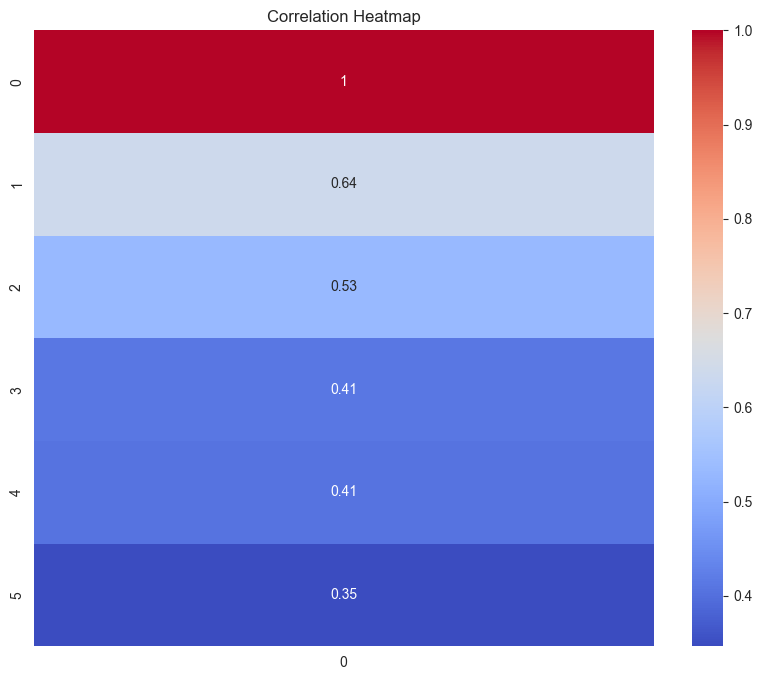

fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


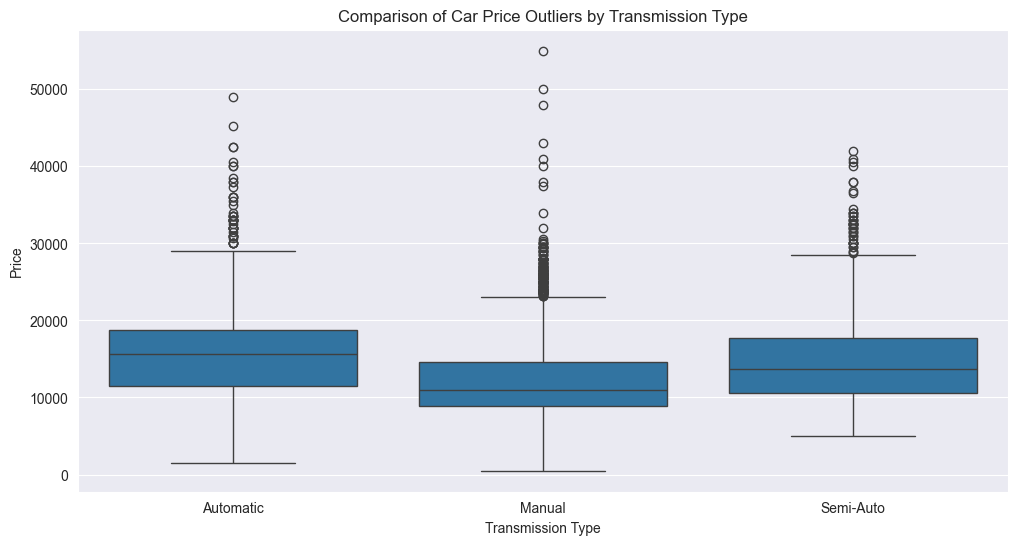

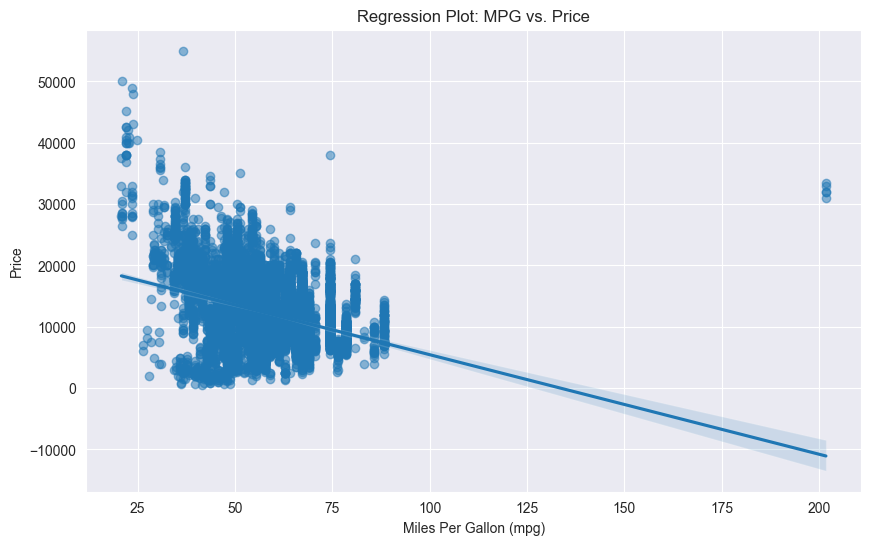

R^2 Score: 0.13252097840163624
Mean Squared Error (MSE): 19441984.663323063
R^2 Score: 0.7297707848827928
Mean Squared Error (MSE): 6125901.226911074
Mean Squared Error (MSE): 5539203.169377451
R^2 Score: 0.7556515409912363
R^2 Score: 0.7297705041777711
(3593, 20)
R^2 Score: 0.7585639875096198
Mean Squared Error (MSE): 5473180.109315126
Fitting 4 folds for each of 100 candidates, totalling 400 fits


C:\Users\M-RECH DESIGN PC\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.2065e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R^2 Score: -4.557210025968131
Mean Squared Error (MSE): 125977939.51151864
Best Alpha: 10000.0


In [4]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# URL of the CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

# Function to load CSV data into a Pandas DataFrame
def load_data(url1):
    # Using pandas read_csv function to load data directly from URL
    df = pd.read_csv(url)

    # Return the DataFrame
    return df

# Load the dataset
used_car_df = load_data(url)

# Display the first few rows of the DataFrame
print(used_car_df.head())

print(used_car_df.shape)

# Display initial shape of the DataFrame
print("Original DataFrame shape:", used_car_df.shape)

# Step 1: Identify columns with missing values
missing_values = used_car_df.isnull().sum()
print("\nColumns with missing values:\n", missing_values[missing_values > 0])

# Step 2: Fill missing values with column's mean
for column in missing_values[missing_values > 0].index:
    used_car_df[column].fillna(used_car_df[column].mean(), inplace=False)

    # Display DataFrame after imputing missing values
print("\nDataFrame after imputing missing values:\n", used_car_df.isnull().sum())

# Step 3: Identify and drop duplicate rows
duplicate_rows = used_car_df.duplicated().sum()
print("\nNumber of duplicate rows before dropping:", duplicate_rows)

used_car_df.drop_duplicates(inplace=False)

# Display DataFrame after removing duplicates

print("\nDataFrame after removing duplicates:\n", used_car_df.shape)

corr_matrix = used_car_df.corr(numeric_only=True).abs()['price'].sort_values(ascending=False)
data = np.asarray(corr_matrix).reshape(6,1)
print(data)
# Step 3: Identify top 5 features
top_corr_features = corr_matrix.head(5).index.tolist()

print(top_corr_features)

# Step 4: Display the results
print("Top 5 features most correlated with 'price':")
for feature in top_corr_features:
    print(f"{feature}: {corr_matrix[feature]:.4f}")

# Step 5: Optional - Visualize the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Attribute to count entries for
attribute = 'fuelType'

# Count entries for each unique value in the specified attribute
entry_counts = used_car_df[attribute].value_counts()


# Print the results
print(entry_counts)

# Adding titles and labels
# Attributes to plot
x_attribute = 'transmission'
y_attribute = 'price'

# Create a Seaborn boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=x_attribute, y=y_attribute, data=used_car_df)
plt.title('Comparison of Car Price Outliers by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')

# Show the plot
plt.show()

# Attributes to plot
x = 'mpg'
y = 'price'

# Create a regression plot using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y, data=used_car_df, scatter_kws={"alpha": 0.5})

# Adding titles and labels
plt.title('Regression Plot: MPG vs. Price')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Price')
# Show the plot
plt.show()

# Model Development and Evaluation
# Prepare features (X) and target (y)
X = used_car_df[['mpg']]
Y = used_car_df['price']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
y_pred = model.predict(X_test)

r2 = r2_score(Y_test, y_pred)
print(f"R^2 Score: {r2}")

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Prepare features (X) and target (y)
used_car_df.dropna(axis=0, how='any', inplace=True)
x = used_car_df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = used_car_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Pipeline Creation
# Define the preprocessing and model steps
pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Scaling the features
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Generating polynomial features
        ('regressor', LinearRegression())  # Linear Regression model
    ])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Split the dataset into training and testing sets (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ridge Regression Model Training
alpha = 0.1  # Regularization parameter
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Model Evaluation R^2 Score
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")

# Polynomial Features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

print(X_test_poly.shape)

# Ridge Regression Model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

 # Predictions
y_pred = ridge_model.predict(X_test_poly)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

# Define Ridge Regression Model with Grid Search over alpha values
param_grid = {'ridge__alpha': np.logspace(-4, 4, 100)}

# Polynomial Features (degree 2)

# Pipeline to orchestrate polynomial transformation and regression
ridge_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('ridge', ridge_model)
    ])

#ridge_pipeline.fit(X_train, y_train)

ridge_cv = GridSearchCV(
        ridge_pipeline, param_grid, cv=4, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1
    )
# Fit on the training data
ridge_cv.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = ridge_cv.predict(X_test_poly)

# # Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

# # Best Parameters
print(f"Best Alpha: {ridge_cv.best_params_['ridge__alpha']}")


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
